In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [ ]:
df = pd.read_csv('/content/emails.csv')

In [ ]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.shape

(5728, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
df.isna().sum()

,0
text,0
spam,0


In [ ]:
df['spam'].value_counts()

,count
spam,
0,4360
1,1368


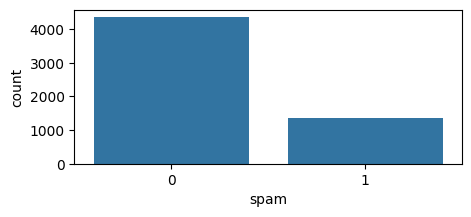

In [ ]:
plt.figure(figsize=(5, 2))
sns.countplot(x='spam', data=df)
plt.show()

In [ ]:
import nltk

In [ ]:
from nltk import word_tokenize

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

In [ ]:
df['count']=df['text'].apply(count_words)

In [ ]:
df['count']

,count
0,325
1,90
2,88
3,99
4,53
...,...
5723,298
5724,245
5725,516
5726,277


In [ ]:
df.groupby('spam')['count'].mean()

,count
spam,
0,346.835321
1,267.896199


In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)


    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
df['text']=df['text'].apply(process_text)

In [ ]:
df['text']

,text
0,Subject naturally irresistible corporate ident...
1,Subject stock trading gunslinger fanny merrill...
2,Subject unbelievable new homes made easy im wa...
3,Subject 4 color printing special request addit...
4,Subject money get software cds software compat...
...,...
5723,Subject research development charges gpg forwa...
5724,Subject receipts visit jim thanks invitation v...
5725,Subject enron case study update wow day super ...
5726,Subject interest david please call shirley cre...


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [ ]:
df['text']=df['text'].apply(stemming)

In [ ]:
df.head()

,text,spam,count
0,subject naturally irresistible corporate ident...,1,325
1,subject stock trading gunslinger fanny merrill...,1,90
2,subject unbelievable new homes made easy im wa...,1,88
3,subject 4 color printing special request addit...,1,99
4,subject money get software cds software compat...,1,53


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(df['text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,df['spam'],test_size=0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       860
           1       0.95      0.99      0.97       286

    accuracy                           0.98      1146
   macro avg       0.97      0.98      0.98      1146
weighted avg       0.98      0.98      0.98      1146



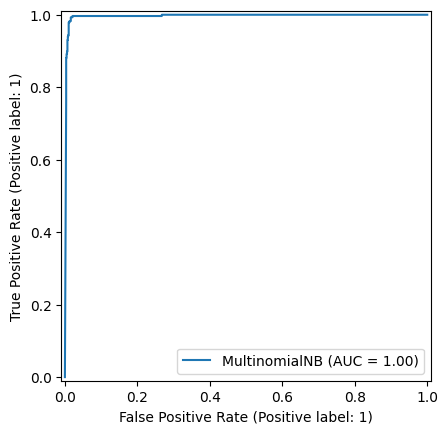

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(nb,X_test,y_test)
plt.show()

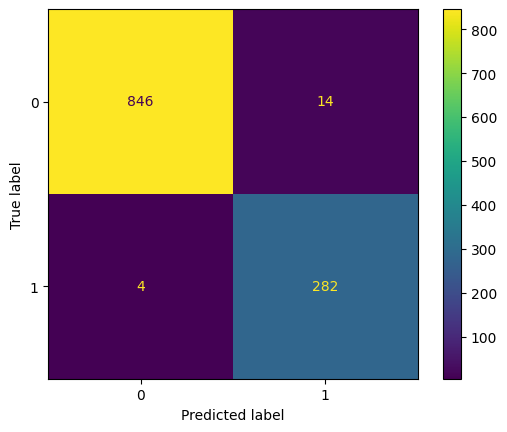

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,df['spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 98.91756403514786  %
